In [15]:
import pandas as pd
import numpy as np
from sklearn import metrics, model_selection, ensemble, neighbors, svm, tree, neural_network, base
import matplotlib.pyplot as plt

import importlib
import datetime
import mlTest
importlib.reload(mlTest)

<module 'mlTest' from 'C:\\Users\\Chunlok Lo\\Documents\\cs4641\\supervised_learning\\implementation\\mlTest.py'>

In [2]:
df = pd.read_csv("data/falldeteciton.csv")

In [3]:
df.shape

(16382, 7)

In [4]:
df.describe()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
count,16382.000000,16382.000000,1.638200e+04,1.638200e+04,16382.000000,16382.000000,16382.000000
mean,2.361494,10936.842478,7.527198e+04,-5.621125e+03,58.251068,211.536992,2894.341472
std,1.739195,5261.463601,1.275022e+05,1.082209e+05,48.292926,129.949521,3825.927830
min,0.000000,1954.230000,4.222420e+01,-1.262600e+07,0.000000,33.000000,5.000000
25%,0.000000,7263.685000,9.941170e+03,-5.630000e+03,25.000000,119.000000,587.000000
50%,3.000000,9769.355000,3.118920e+04,-3.361275e+03,44.000000,180.000000,1581.000000
75%,4.000000,13481.650000,8.076145e+04,-2.150000e+03,78.000000,271.000000,3539.000000
max,5.000000,50895.500000,2.426140e+06,1.410000e+06,533.000000,986.000000,52210.000000


In [5]:
X = df.drop(['ACTIVITY'], axis=1)
y = df['ACTIVITY']

In [6]:
X_train, X_val, X_test, X_train_val, y_train, y_val, y_test, y_train_val = mlTest.train_val_test_split(X, y, train_size=0.8, val_size=0.1)

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(13104, 6)
(1639, 6)
(1639, 6)


Decision Tree TESTING

Processing Param Val: 0.0188888888888888896
0.6951706997530184


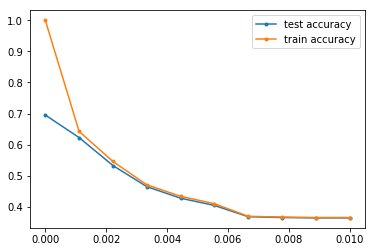

In [24]:
param = ('min_impurity_decrease', np.linspace(0, .01, num=10))
classifier = tree.DecisionTreeClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "decisionTree", descriptors="impurity_train-acc")
mlTest.saveNpArray(test_acc, "decisionTree", descriptors="impurity_test-acc")
mlTest.saveNpArray(param_vals, "decisionTree", descriptors="impurity_vals")

f1_micro because relative balance of classes

[ 1  2  3  4  5  6  7  8  9 10]
Processing Param Val: 1000


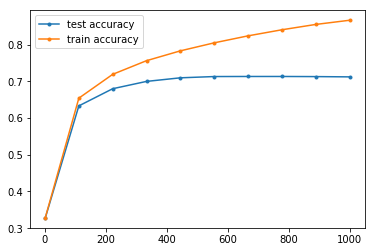

In [25]:
print(np.linspace(1, 10, num=10, dtype=int))
param = ('max_leaf_nodes', np.linspace(2, 1000, num=10, dtype=int))
classifier = tree.DecisionTreeClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='f1_micro')

mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "decisionTree", descriptors="max-leaf-nodes_train-acc")
mlTest.saveNpArray(test_acc, "decisionTree", descriptors="max-leaf-nodes_test-acc")
mlTest.saveNpArray(param_vals, "decisionTree", descriptors="max-leaf-nodes_vals")

Processing Param Val: 1000


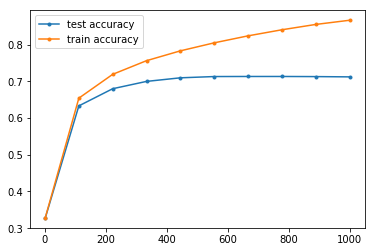

In [26]:
param = ('max_leaf_nodes', np.linspace(2, 1000, num=10, dtype=int))
classifier = tree.DecisionTreeClassifier(random_state=0, criterion='entropy')
train_acc2, test_acc2, param_vals2 = mlTest.paramTest(classifier, param, X_train_val, y_train_val)
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc2, "decisionTree", descriptors="max-leaf-nodes_train-acc_entropy")
mlTest.saveNpArray(test_acc2, "decisionTree", descriptors="max-leaf-nodes_test-acc_entropy")
mlTest.saveNpArray(param_vals2, "decisionTree", descriptors="max-leaf-nodes_vals_entropy")

In [27]:
print(param_vals[np.argmax(test_acc)])

667


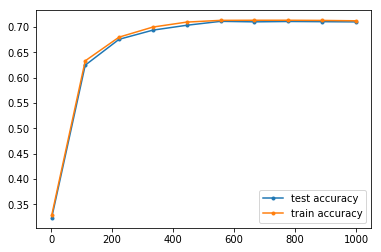

In [21]:
mlTest.plot_accuracy(test_acc, test_acc2, param_vals)

[[384   2   5  17  33  11]
 [  0  49  12   0   1   0]
 [  4   5 187  41   4   2]
 [  3   1  48 224  67   3]
 [ 13   0  12  76 216  25]
 [ 10   1   8  24  58  93]]
0.7034777303233679


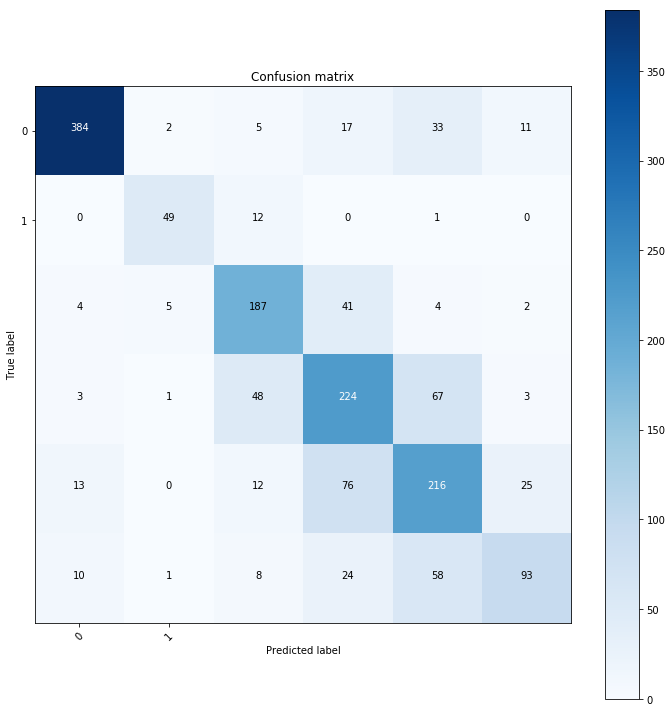

In [29]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=667)
clf.fit(X_train_val, y_train_val)
cnf_matrix, accuracy = mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])
print(accuracy)

[[379   1   4  17  29  22]
 [  0  43  17   0   1   1]
 [  4  10 170  43  13   3]
 [  3   2  55 206  73   7]
 [ 14   0  12  54 221  41]
 [  9   0   5  19  57 104]]
0.6851738865161684


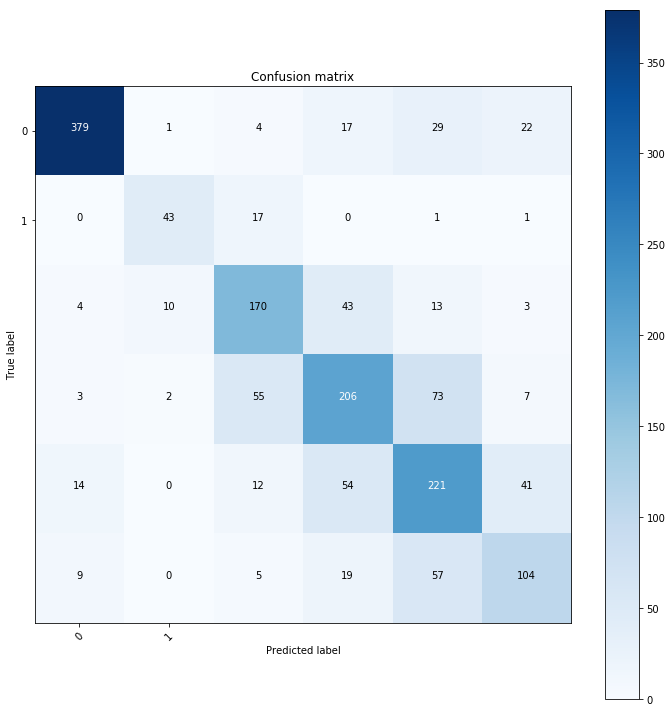

In [30]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_val, y_train_val)
cnf_matrix, accuracy = mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])
print(accuracy)

In [29]:
y_pred = clf.predict(X_test)
metrics.precision_recall_fscore_support(y_test, y_pred)

(array([0.9182243 , 0.74137931, 0.68560606, 0.61842105, 0.52339181,
        0.5988024 ]),
 array([0.85434783, 0.82692308, 0.72111554, 0.63513514, 0.54907975,
        0.55555556]),
 array([0.88513514, 0.78181818, 0.70291262, 0.62666667, 0.53592814,
        0.57636888]),
 array([460,  52, 251, 370, 326, 180], dtype=int64))

In [10]:
clf = svm.LinearSVC(max_iter=3000)
clf.fit(X_train_val, y_train_val)

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=3000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

[[ 24   0   0   0 436   0]
 [  0  13   0   0  39   0]
 [  1   4   0   0 246   0]
 [  4   0   0   2 364   0]
 [  1   0   0   0 325   0]
 [  2   1   0   0 177   0]]


0.22208663819402075

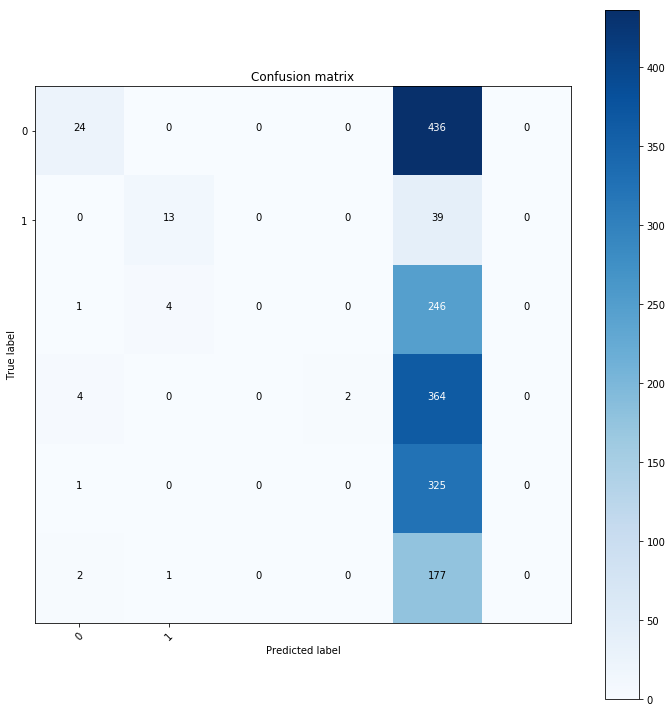

In [11]:
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

[[416   2   7  21  25  12]
 [  0  32  13   0   0   0]
 [  1  11 145  54  10   2]
 [  8   0  49 222  58  12]
 [ 16   1  20  78 205  41]
 [ 13   0   7  19  47  92]]


0.6784624771201953

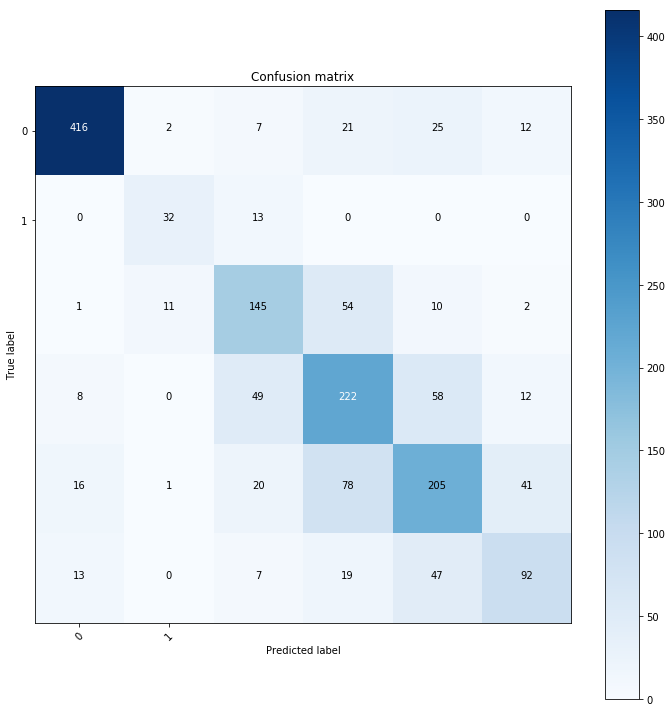

In [14]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

KNN TESTING

Hyperparameter testing:
K

In [34]:
param = ('n_neighbors', np.linspace(1, 40, num=10, dtype=int))
classifier = neighbors.KNeighborsClassifier()
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')

Processing Param Val: 40


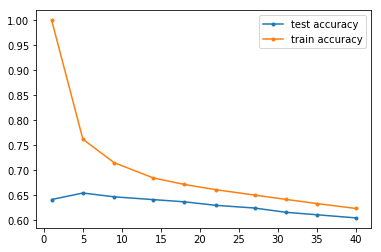

In [36]:
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc2, "KNN", descriptors="n_neighbor-train_acc")
mlTest.saveNpArray(test_acc2, "KNN", descriptors="n_neighbor-test_acc")
mlTest.saveNpArray(param_vals2, "KNN", descriptors="n_neighbor-params")

In [22]:
clf = neighbors.KNeighborsClassifier(n_neighbors=8)
train_acc, test_acc, param_vals = KNNTest(X_train_val, y_train_val)

NameError: name 'plot_accuracy' is not defined

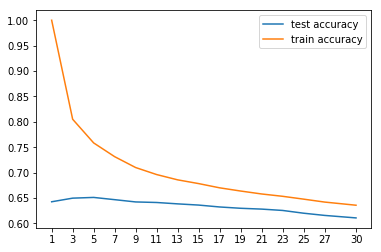

In [23]:
def plot_accuracy(train_acc, test_acc, x_vals, detail=False):
    plt.plot(x_vals, test_acc, label='test accuracy')
    plt.plot(x_vals, train_acc, label='train accuracy')
    if detail:
        plt.xticks(x_vals)
    plt.legend()
    #plt.ylim(0, 1)
    plt.show()
plot_accuracy(train_acc, test_acc, param_vals, detail=True)

[[418   2   7  19  25  12]
 [  0  31  14   0   0   0]
 [  1  10 149  52   8   3]
 [  7   0  49 226  55  12]
 [ 16   1  24  70 206  44]
 [ 14   0   8  19  46  91]]


0.6839536302623551

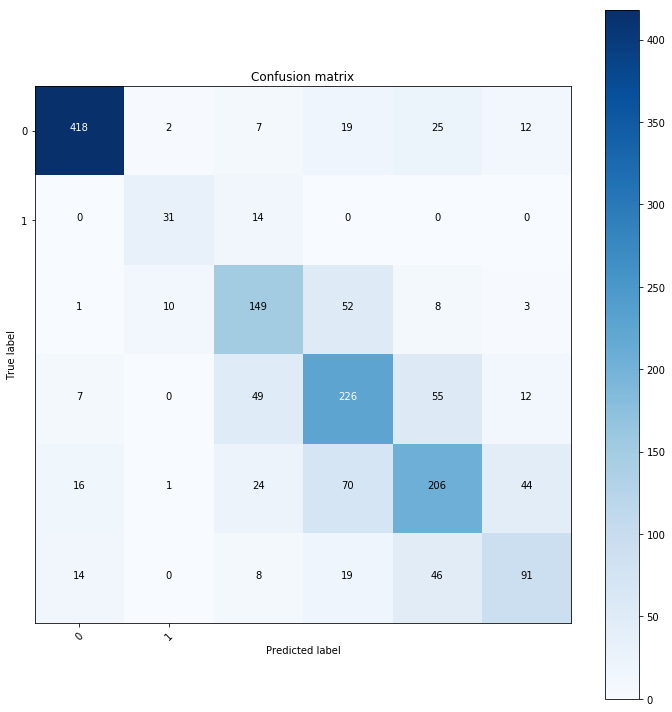

In [19]:
clf = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(), random_state=0, n_estimators=200)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

In [64]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import numpy as np

model = Sequential()
model.add(Dense(24,input_shape=(6,)))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(24))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(1))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
model.fit(X_train.values, y_train.values, epochs=5, batch_size=4096, validation_data=(X_val.values, y_val.values))
#mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

Train on 13104 samples, validate on 1639 samples
Epoch 1/5
13104/13104 [==============================] - 0s 31us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/5
13104/13104 [==============================] - 0s 3us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/5
13104/13104 [==============================] - 0s 3us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/5
13104/13104 [==============================] - 0s 3us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/5
13104/13104 [==============================] - 0s 2us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00


In [45]:
X_train.shape

(13104, 6)